**Context**

This dataset is created for prediction of Graduate Admissions from an Indian perspective.

---

**Content**

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

GRE Scores ( out of 340 )
TOEFL Scores ( out of 120 )
University Rating ( out of 5 )
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
Undergraduate GPA ( out of 10 )
Research Experience ( either 0 or 1 )
Chance of Admit ( ranging from 0 to 1 )

---

**Acknowledgements**

This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.
The dataset is owned by Mohan S Acharya.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/Admission_Predict_Ver1.1.csv')

df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
#identifying missing data
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

**Exploratory Data Analysis**

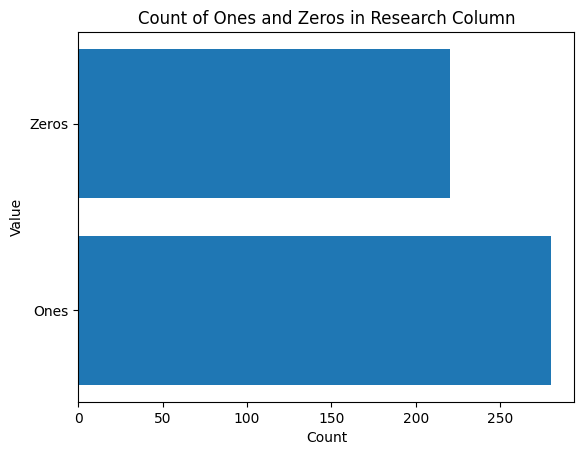

In [3]:
# Count the occurrences of ones and zeros in the 'Research' column
ones_count = df['Research'].sum()
zeros_count = len(df) - ones_count

# Create a horizontal bar chart
plt.barh(['Ones', 'Zeros'], [ones_count, zeros_count])

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Value')
plt.title('Count of Ones and Zeros in Research Column')

# Display the chart
plt.show()

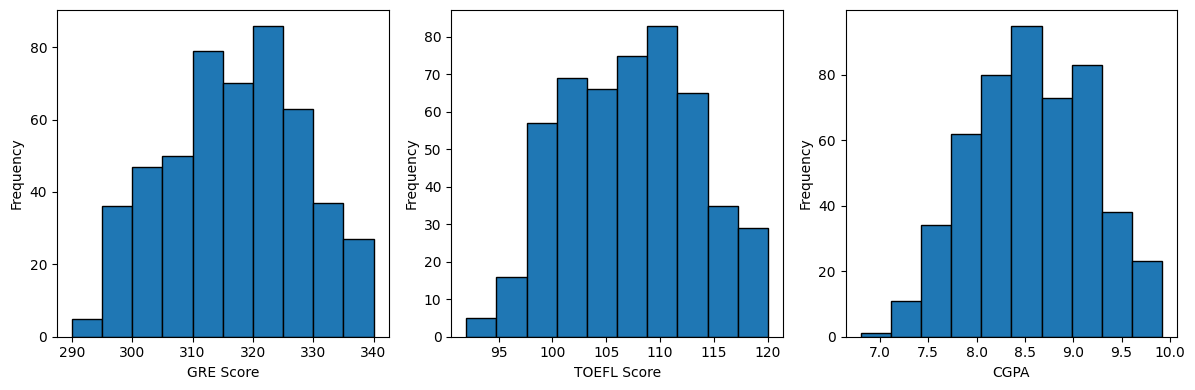

In [7]:
# Create a figure and three subplots for each histogram
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot the histograms in each subplot
axs[0].hist(df['GRE Score'], bins=10, edgecolor='black')
axs[0].set_xlabel('GRE Score')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['TOEFL Score'], bins=10, edgecolor='black')
axs[1].set_xlabel('TOEFL Score')
axs[1].set_ylabel('Frequency')

axs[2].hist(df['CGPA'], bins=10, edgecolor='black')
axs[2].set_xlabel('CGPA')
axs[2].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

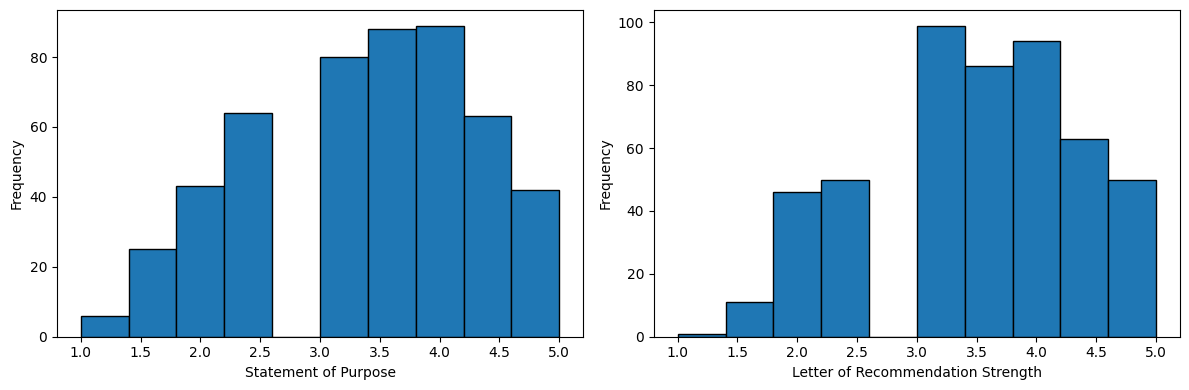

In [17]:
# Create a figure and two subplots for each histogram
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the histograms in each subplot
axs[0].hist(df['SOP'], edgecolor='black')
axs[0].set_xlabel('Statement of Purpose')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['LOR '], edgecolor='black')
axs[1].set_xlabel('Letter of Recommendation Strength')
axs[1].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

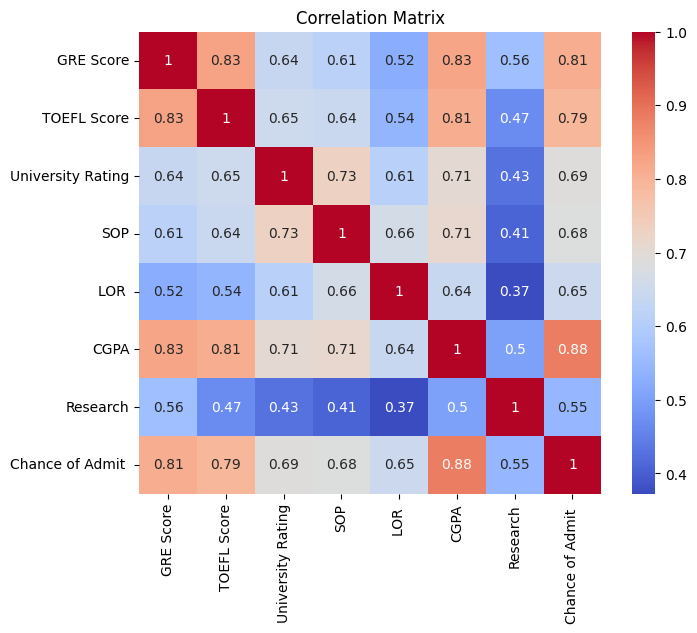

In [19]:
import seaborn as sns
selected_columns = df.iloc[:, 1:]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

# Display the plot
plt.show()

**Classification**

---


In [22]:
# Replace values above 0.8 with 1 and others with 0
df['Chance of Admit '] = np.where(df['Chance of Admit '] >= 0.8, 1, 0)

# Display the modified DataFrame
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1    

In [23]:
# Remove the first column
df = df.drop(df.columns[0], axis=1)

# Display the modified DataFrame
print(df)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit   
0                   1  
1                   0  
2  

**Decision Tree Classifier**

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

# Split into dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#Split into train and test subsets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [25]:
#create a decision tree and fit it to the traiing data
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(X_train,y_train)

[Text(0.39928698752228164, 0.9642857142857143, 'CGPA <= 8.845\ngini = 0.435\nsamples = 375\nvalue = [255, 120]\nclass = Admitted'),
 Text(0.14260249554367202, 0.8928571428571429, 'CGPA <= 8.63\ngini = 0.1\nsamples = 246\nvalue = [233, 13]\nclass = Admitted'),
 Text(0.0855614973262032, 0.8214285714285714, 'LOR  <= 1.75\ngini = 0.01\nsamples = 192\nvalue = [191, 1]\nclass = Admitted'),
 Text(0.0570409982174688, 0.75, 'TOEFL Score <= 106.0\ngini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = Admitted'),
 Text(0.0285204991087344, 0.6785714285714286, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = Admitted'),
 Text(0.0855614973262032, 0.6785714285714286, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Not Admitted'),
 Text(0.1140819964349376, 0.75, 'gini = 0.0\nsamples = 183\nvalue = [183, 0]\nclass = Admitted'),
 Text(0.19964349376114082, 0.8214285714285714, 'TOEFL Score <= 105.5\ngini = 0.346\nsamples = 54\nvalue = [42, 12]\nclass = Admitted'),
 Text(0.1711229946524064, 0.75, 'gini = 0

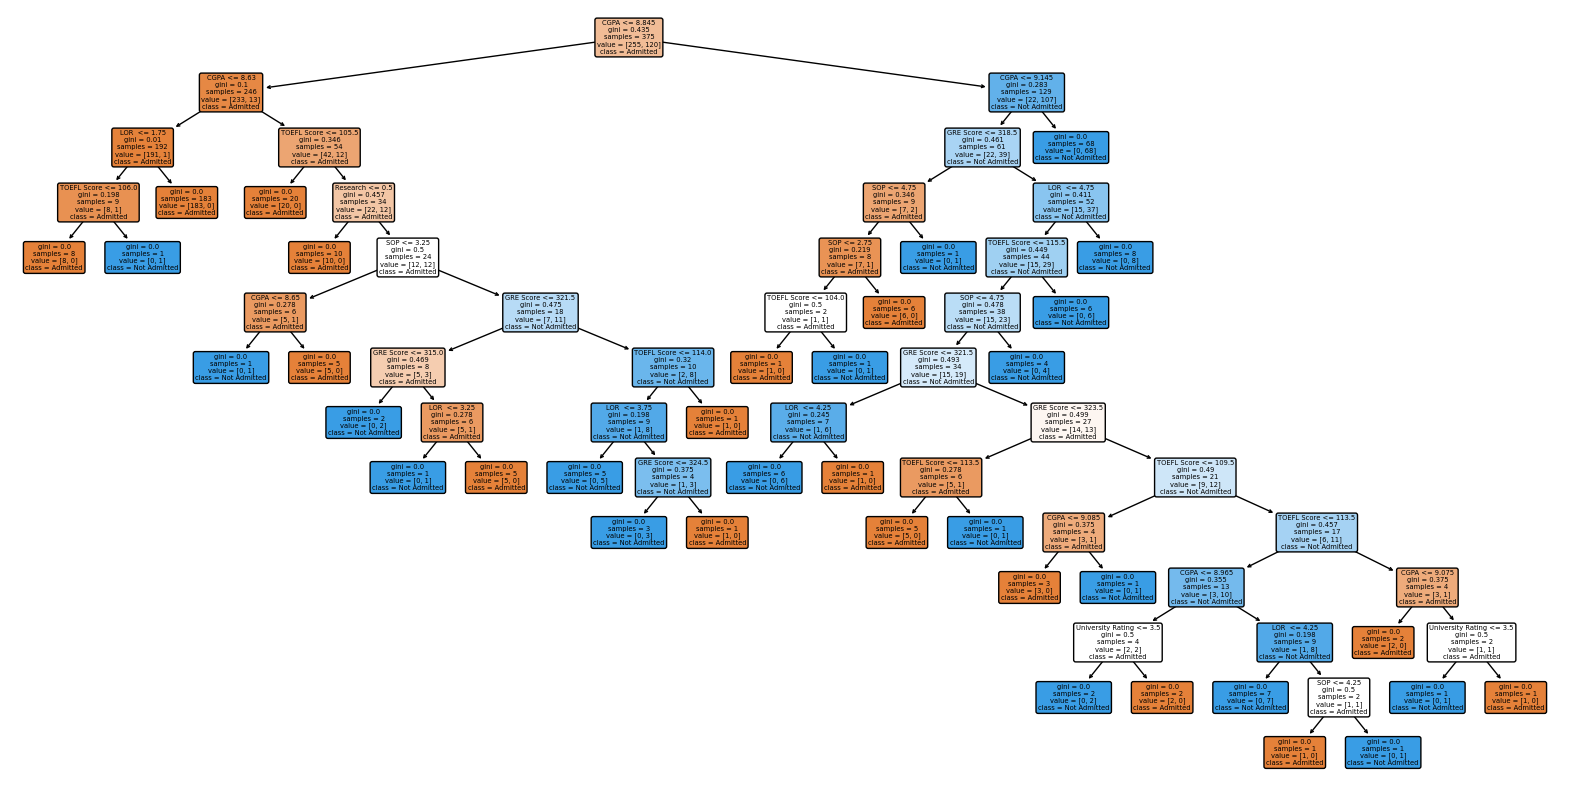

In [27]:
plt.figure(figsize=(20,10))
plot_tree(clf_dt,filled=True,rounded=True,class_names=["Admitted","Not Admitted"],feature_names=X.columns)

Cost Complexity Pruning Part 1 : Visualize alpha

In [28]:
path = clf_dt.cost_complexity_pruning_path(X_train,y_train) #determine values for alpha
ccp_alphas = path.ccp_alphas #extract different values for alpha
ccp_alphas = ccp_alphas[:-1] #exclude the maximum value for alpha
clf_dts = [] #create an array that we will put decision trees into
for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf_dt.fit(X_train,y_train)
  clf_dts.append(clf_dt)

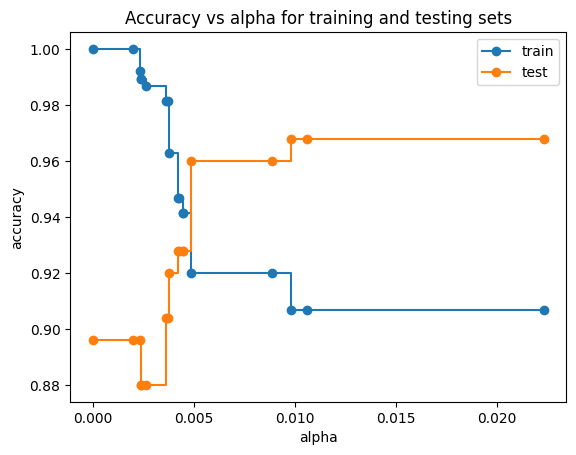

In [30]:
train_scores = [clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Cross Complexity Pruning Part 2 : Cross Validation For Finding the Best Alpha

<Axes: xlabel='tree'>

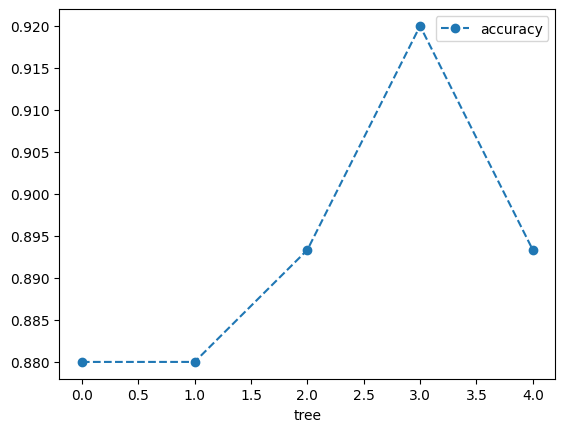

In [39]:
from sklearn.model_selection import cross_val_score

clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.009) #create the tree with ccp_alpha=0.009
#now use 5-fold cross validation create 5 different training and testing datasets that are then used to train and test the tree
#note: we use 5-fold cross validation because we don't have tons of data

scores = cross_val_score(clf_dt, X_train,y_train, cv=5)
df = pd.DataFrame(data={'tree':range(5),'accuracy':scores})
df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

<Axes: xlabel='alpha'>

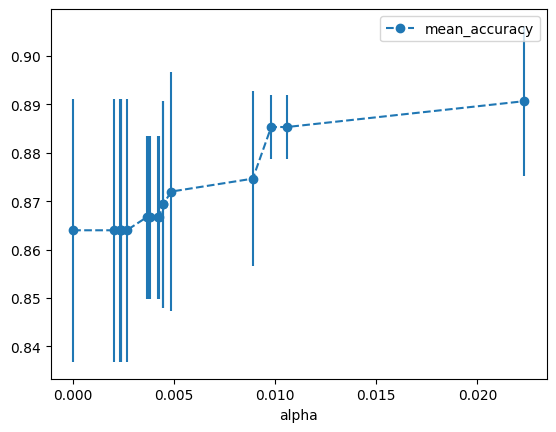

In [40]:
alpha_loop_values=[]
# for each akpha value, we run 5-fold cross validation
# then we will store the mean and the standard deviation of the scores (the accuracy) for each call
#to cross_cal_score in alpha_loop_values
for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  scores = cross_val_score(clf_dt,X_train,y_train, cv=5)
  alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])

#now we can draw a graph of the means and standard deviations of the scores
#for each candidate value for alpha

alpha_results = pd.DataFrame(alpha_loop_values, columns = ['alpha','mean_accuracy','std'])
alpha_results.plot(x="alpha",y="mean_accuracy",yerr="std",marker="o",linestyle='--')

In [48]:
alpha_results[(alpha_results['alpha']>0.009) & (alpha_results['alpha']<0.01)]

,alpha,mean_accuracy,std
15,0.009797,0.885333,0.006532


In [50]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.009) & (alpha_results['alpha']<0.01)]['alpha']
ideal_ccp_alpha

15    0.009797
Name: alpha, dtype: float64

In [51]:
#convert ideal_ccp_alpha from a series to a float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.009797020223249742

In [67]:
#Build and train a new decision tree, only this time use the optimal value for alpha
clf_dt_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train,y_train)

Model Evaluation

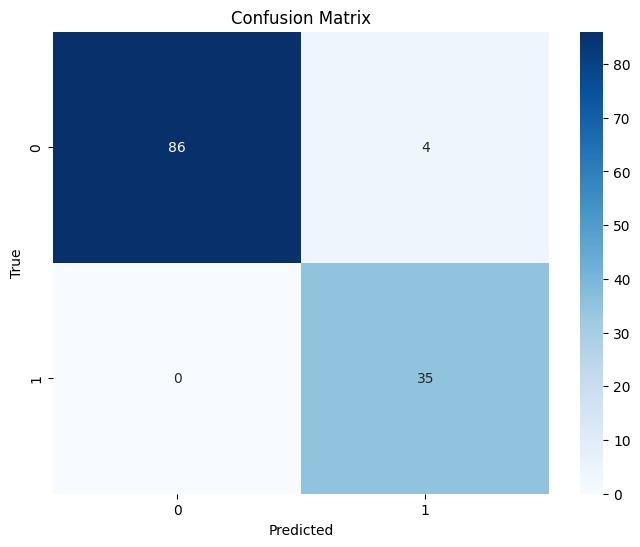

In [70]:
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_pred = clf_dt_pruned.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [71]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.968


**Logistic Rgeression**

In [72]:
from sklearn.linear_model import LogisticRegression

# Instantiate a logistic regression object
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_LogR = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evaluation

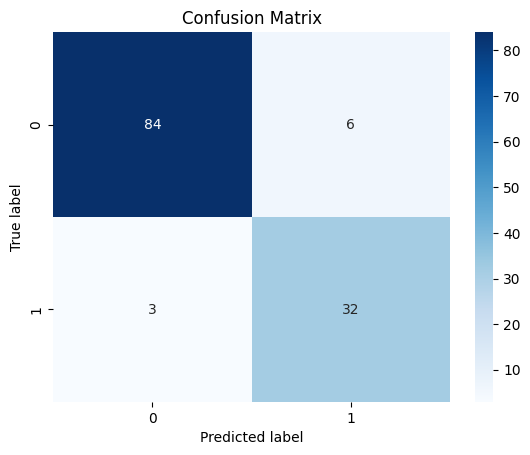

In [77]:
# Visualize the model using a confusion matrix
cm = confusion_matrix(y_test, y_pred_LogR)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [78]:
#accuracy
acc_score_LogR = accuracy_score(y_test,y_pred_LogR)
print(acc_score_LogR)

0.928


**Conclusion**

Both of the models gave off good results, with Decision Tree Classifier model being more accurate with accuracy score 0.968.